# PREDICTING AVOCADO PRICES USING FACEBOOK PROPHET

- Data represents weekly 2018 retail scan data for National retail volume (units) and price. 
- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
- The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold



![AVOCADO](images/image.jpeg)

### Step 1: Import data

- You must install fbprophet package as follows: 
     pip install fbprophet
     
- If you encounter an error, try: 
    conda install -c conda-forge fbprophet

- Prophet is open source software released by Facebook’s Core Data Science team.

- Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 

- Prophet works best with time series that have strong seasonal effects and several seasons of historical data. 

- For more information, please check this out: https://research.fb.com/prophet-forecasting-at-scale/
https://facebook.github.io/prophet/docs/quick_start.html#python-api


In [1]:
# pandas for working with data. As MS Excel
import pandas as pd
import numpy as np
import random
# pyplot and seaborn need for visualisation a data
import matplotlib.pyplot as plt
import seaborn as sns
# Facebook prophet
from fbprophet import Prophet

In [2]:
avocado_df = pd.read_csv('data/avocado.csv')

### Step 2: Exploring the data

In [3]:
avocado_df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [4]:
avocado_df.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
avocado_df = avocado_df.sort_values('Date')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


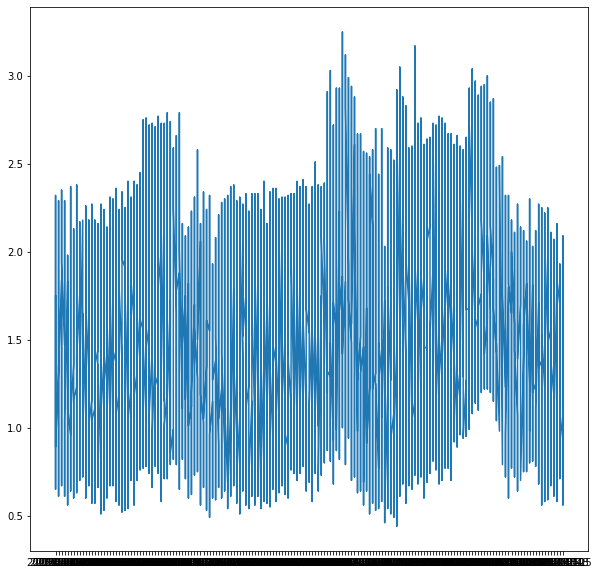

In [12]:
plt.figure(figsize=(10, 10))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

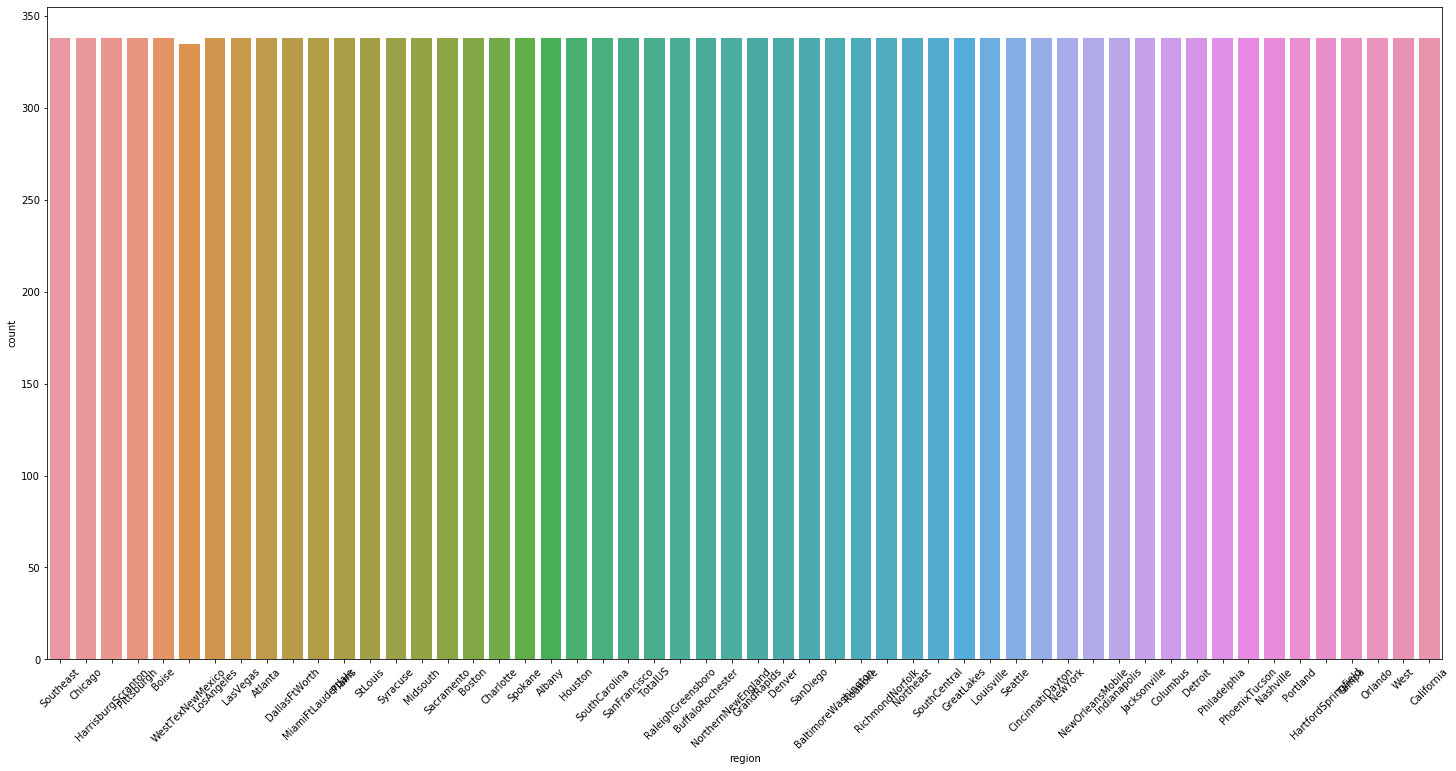

In [13]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation = 45)

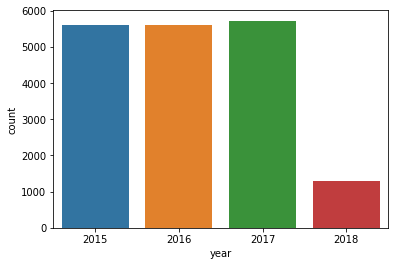

In [14]:
sns.countplot(x = 'year', data = avocado_df)

In [17]:
# remove extra columns
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']]
avocado_prophet_df.tail()

,Date,AveragePrice
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70
8814,2018-03-25,1.34


### Step 3: Make predictions

In [18]:
avocado_prophet_df = avocado_prophet_df.rename(columns={'Date': 'ds', 'AveragePrice': 'y'})

In [19]:
avocado_prophet_df.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [20]:
m = Prophet()

In [21]:
m.fit(avocado_prophet_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
# forcast the future (365 days)
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [23]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.499120,0.892056,1.891350,1.499120,1.499120,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,0.0,0.0,0.0,1.384733
1,2015-01-04,1.499120,0.903997,1.871779,1.499120,1.499120,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,0.0,0.0,0.0,1.384733
2,2015-01-04,1.499120,0.901159,1.916825,1.499120,1.499120,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,0.0,0.0,0.0,1.384733
3,2015-01-04,1.499120,0.891566,1.857453,1.499120,1.499120,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,0.0,0.0,0.0,1.384733
4,2015-01-04,1.499120,0.878573,1.835295,1.499120,1.499120,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,0.0,0.0,0.0,1.384733
5,2015-01-04,1.499120,0.884355,1.843377,1.499120,1.499120,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,0.0,0.0,0.0,1.384733
6,2015-01-04,1.499120,0.824811,1.875233,1.499120,1.499120,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,0.0,0.0,0.0,1.384733
7,2015-01-04,1.499120,0.898776,1.885118,1.499120,1.499120,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,0.0,0.0,0.0,1.384733
8,2015-01-04,1.499120,0.883206,1.857608,1.499120,1.499120,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,0.0,0.0,0.0,1.384733
9,2015-01-04,1.499120,0.937693,1.914574,1.499120,1.499120,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,0.0,0.0,0.0,1.384733


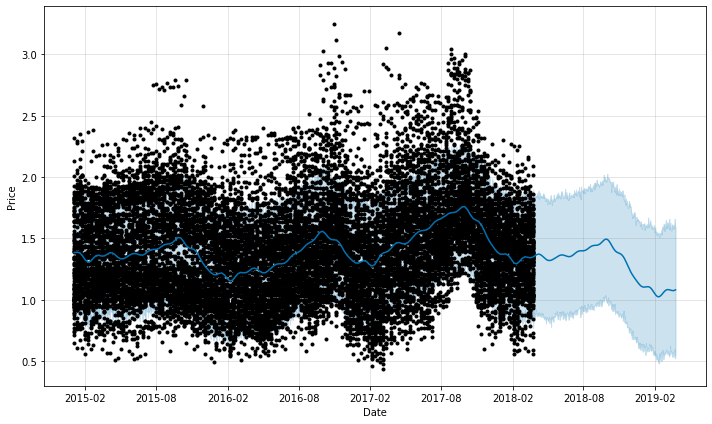

In [24]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

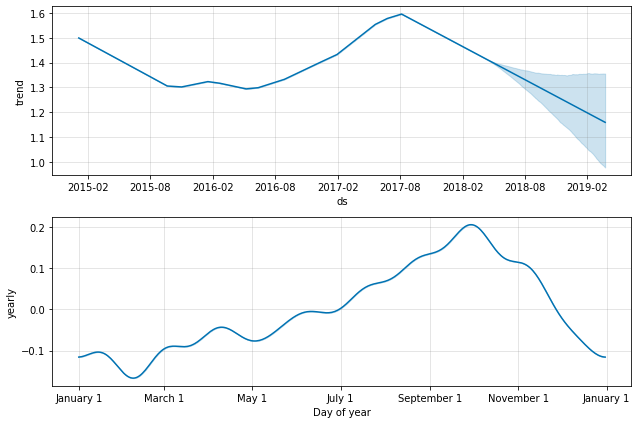

In [25]:
figure = m.plot_components(forecast)

## Part 2: Region specific

In [26]:
avocado_df = pd.read_csv('data/avocado.csv')
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [27]:
avocado_df_sample = avocado_df[avocado_df['region'] == 'West']
avocado_df_sample.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,0,2015-12-27,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,5144.13,conventional,2015,West
2705,1,2015-12-20,0.88,4737649.03,2017331.24,1314711.00,130849.60,1274757.19,843691.13,417746.45,13319.61,conventional,2015,West
2706,2,2015-12-13,0.85,4899439.92,1798995.46,1596329.01,134101.62,1370013.83,851506.76,517936.19,570.88,conventional,2015,West
2707,3,2015-12-06,0.75,6202513.84,2097720.52,2051392.83,107568.34,1945832.15,1360760.83,582846.33,2224.99,conventional,2015,West
2708,4,2015-11-29,0.99,3719603.21,1461861.54,1216811.00,104219.76,936710.91,688674.00,247318.15,718.76,conventional,2015,West


In [28]:
avocado_df_sample = avocado_df_sample.sort_values('Date')

In [29]:
avocado_df_sample.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


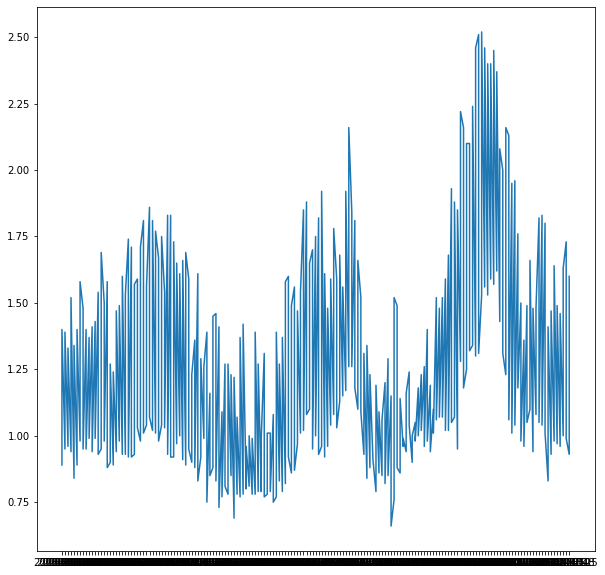

In [31]:
plt.figure(figsize=(10,10))
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])

In [36]:
m2 = Prophet()

In [37]:
# remove extra columns
avocado_prophet_df_sample = avocado_df_sample[['Date', 'AveragePrice']]

In [38]:
avocado_prophet_df_sample = avocado_prophet_df_sample.rename(columns={'Date': 'ds', 'AveragePrice': 'y'})

In [39]:
m2.fit(avocado_prophet_df_sample)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
# forcast the future (365 days)
future_sample = m2.make_future_dataframe(periods = 365)
forecast_sample = m2.predict(future_sample)

In [41]:
forecast_sample

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.244835,0.654038,1.472268,1.244835,1.244835,-0.184885,-0.184885,-0.184885,-0.184885,-0.184885,-0.184885,0.0,0.0,0.0,1.059950
1,2015-01-04,1.244835,0.658726,1.456980,1.244835,1.244835,-0.184885,-0.184885,-0.184885,-0.184885,-0.184885,-0.184885,0.0,0.0,0.0,1.059950
2,2015-01-11,1.243992,0.637775,1.486233,1.243992,1.243992,-0.165295,-0.165295,-0.165295,-0.165295,-0.165295,-0.165295,0.0,0.0,0.0,1.078696
3,2015-01-11,1.243992,0.680034,1.510720,1.243992,1.243992,-0.165295,-0.165295,-0.165295,-0.165295,-0.165295,-0.165295,0.0,0.0,0.0,1.078696
4,2015-01-18,1.243148,0.639584,1.506408,1.243148,1.243148,-0.156108,-0.156108,-0.156108,-0.156108,-0.156108,-0.156108,0.0,0.0,0.0,1.087040
5,2015-01-18,1.243148,0.627951,1.514204,1.243148,1.243148,-0.156108,-0.156108,-0.156108,-0.156108,-0.156108,-0.156108,0.0,0.0,0.0,1.087040
6,2015-01-25,1.242305,0.632677,1.507163,1.242305,1.242305,-0.168793,-0.168793,-0.168793,-0.168793,-0.168793,-0.168793,0.0,0.0,0.0,1.073513
7,2015-01-25,1.242305,0.658769,1.465517,1.242305,1.242305,-0.168793,-0.168793,-0.168793,-0.168793,-0.168793,-0.168793,0.0,0.0,0.0,1.073513
8,2015-02-01,1.241462,0.610621,1.425413,1.241462,1.241462,-0.191182,-0.191182,-0.191182,-0.191182,-0.191182,-0.191182,0.0,0.0,0.0,1.050280
9,2015-02-01,1.241462,0.615145,1.487294,1.241462,1.241462,-0.191182,-0.191182,-0.191182,-0.191182,-0.191182,-0.191182,0.0,0.0,0.0,1.050280


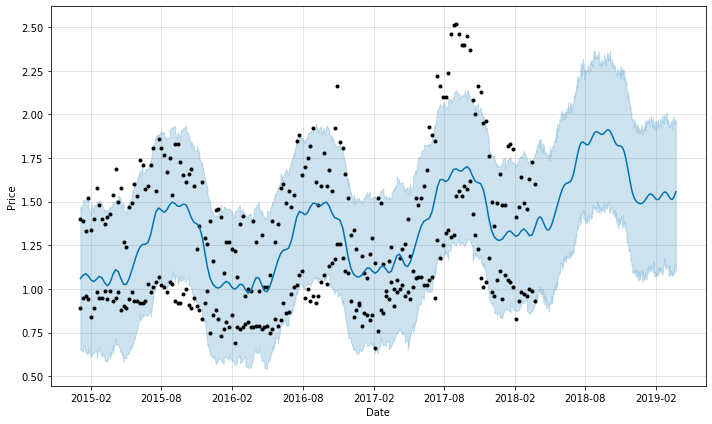

In [42]:
figure = m2.plot(forecast_sample, xlabel = 'Date', ylabel = 'Price')

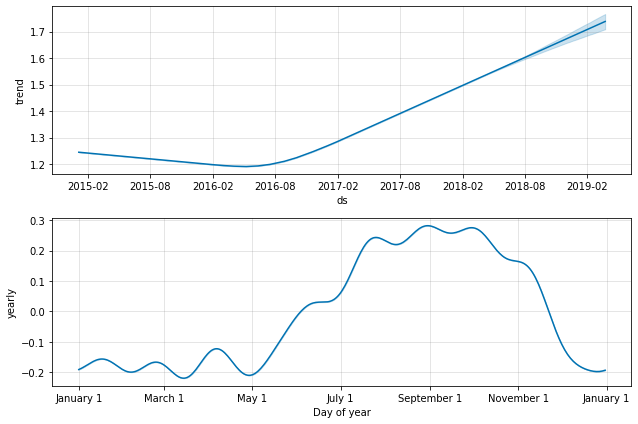

In [43]:
figure = m2.plot_components(forecast_sample)